# Vectorization

## Using for loop

In [1]:
v = [1,2,3,4,5]
v2 = [2 * i for i in v]
v2

[2, 4, 6, 8, 10]

In [2]:
2 * v

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

## Vectorization with Numpy

In [3]:
import numpy as np
a = np.array(v)
a

array([1, 2, 3, 4, 5])

In [4]:
type(a)

numpy.ndarray

In [5]:
2 * a

array([ 2,  4,  6,  8, 10])

In [6]:
b = np.arange(12).reshape((4, 3))

In [7]:
b

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [8]:
b * 2

array([[ 0,  2,  4],
       [ 6,  8, 10],
       [12, 14, 16],
       [18, 20, 22]])

In [9]:
b ** 2

array([[  0,   1,   4],
       [  9,  16,  25],
       [ 36,  49,  64],
       [ 81, 100, 121]], dtype=int32)

In [29]:
# mean for np.ndarray is by default to the full array
b.mean()

5.5

In [11]:
np.mean(b)

5.5

In [12]:
b.mean(axis=0)

array([4.5, 5.5, 6.5])

In [26]:
b.mean(axis=1)

array([ 1.,  4.,  7., 10.])

In [13]:
np.mean(b, axis=1)

array([ 1.,  4.,  7., 10.])

## Vectorization with Pandas

In [19]:
a = np.arange(21).reshape((7, 3))
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14],
       [15, 16, 17],
       [18, 19, 20]])

In [21]:
import pandas as pd
columns = list('abc')
index = pd.date_range('2023-7-1', periods=7, freq='B')
df = pd.DataFrame(a, columns=columns, index=index)
df

,a,b,c
2023-07-03,0,1,2
2023-07-04,3,4,5
2023-07-05,6,7,8
2023-07-06,9,10,11
2023-07-07,12,13,14
2023-07-10,15,16,17
2023-07-11,18,19,20


In [22]:
2 * df

,a,b,c
2023-07-03,0,2,4
2023-07-04,6,8,10
2023-07-05,12,14,16
2023-07-06,18,20,22
2023-07-07,24,26,28
2023-07-10,30,32,34
2023-07-11,36,38,40


In [23]:
df.sum()

a    63
b    70
c    77
dtype: int64

In [28]:
df.sum(axis=0)

a    63
b    70
c    77
dtype: int64

In [24]:
df.sum(axis=1)

2023-07-03     3
2023-07-04    12
2023-07-05    21
2023-07-06    30
2023-07-07    39
2023-07-10    48
2023-07-11    57
Freq: B, dtype: int64

In [25]:
df.mean()

a     9.0
b    10.0
c    11.0
dtype: float64

In [27]:
df.mean(axis=0)

a     9.0
b    10.0
c    11.0
dtype: float64

In [31]:
df['a']

2023-07-03     0
2023-07-04     3
2023-07-05     6
2023-07-06     9
2023-07-07    12
2023-07-10    15
2023-07-11    18
Freq: B, Name: a, dtype: int32

In [33]:
df['a'] + df['c']

2023-07-03     2
2023-07-04     8
2023-07-05    14
2023-07-06    20
2023-07-07    26
2023-07-10    32
2023-07-11    38
Freq: B, dtype: int32

In [34]:
df.a * 2 + df.c

2023-07-03     2
2023-07-04    11
2023-07-05    20
2023-07-06    29
2023-07-07    38
2023-07-10    47
2023-07-11    56
Freq: B, dtype: int32

In [35]:
df.a > 5

2023-07-03    False
2023-07-04    False
2023-07-05     True
2023-07-06     True
2023-07-07     True
2023-07-10     True
2023-07-11     True
Freq: B, Name: a, dtype: bool

In [36]:
df[df['a'] > 5]

,a,b,c
2023-07-05,6,7,8
2023-07-06,9,10,11
2023-07-07,12,13,14
2023-07-10,15,16,17
2023-07-11,18,19,20


In [37]:
df['c'] > df['b']

2023-07-03    True
2023-07-04    True
2023-07-05    True
2023-07-06    True
2023-07-07    True
2023-07-10    True
2023-07-11    True
Freq: B, dtype: bool

## Simple Moving Averages## Simple Moving Averages

In [38]:
raw = pd.read_csv('data/pyalgo_eikon_eod_data.csv')

In [39]:
raw.head()

,Date,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
0,2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
1,2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2,2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
3,2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
4,2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82


In [40]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2609 entries, 0 to 2608
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2609 non-null   object 
 1   AAPL.O  2516 non-null   float64
 2   MSFT.O  2516 non-null   float64
 3   INTC.O  2516 non-null   float64
 4   AMZN.O  2516 non-null   float64
 5   GS.N    2516 non-null   float64
 6   SPY     2516 non-null   float64
 7   .SPX    2516 non-null   float64
 8   .VIX    2516 non-null   float64
 9   EUR=    2609 non-null   float64
 10  XAU=    2602 non-null   float64
 11  GDX     2516 non-null   float64
 12  GLD     2516 non-null   float64
dtypes: float64(12), object(1)
memory usage: 265.1+ KB


In [41]:
data = pd.DataFrame(raw['EUR='])

In [45]:
data.head()

,EUR=
0,1.4323
1,1.4411
2,1.4368
3,1.4412
4,1.4318


In [46]:
data.rename(columns={'EUR=': 'price'}, inplace=True)

In [47]:
data.head()

,price
0,1.4323
1,1.4411
2,1.4368
3,1.4412
4,1.4318


In [50]:
data['SMA1'] = data['price'].rolling(42).mean()
data['SMA2'] = data['price'].rolling(252).mean()
data.tail()

,price,SMA1,SMA2
2604,1.1096,1.107476,1.118769
2605,1.1175,1.107540,1.118624
2606,1.1197,1.107652,1.118505
2607,1.1210,1.107760,1.118403
2608,1.1210,1.107960,1.118298


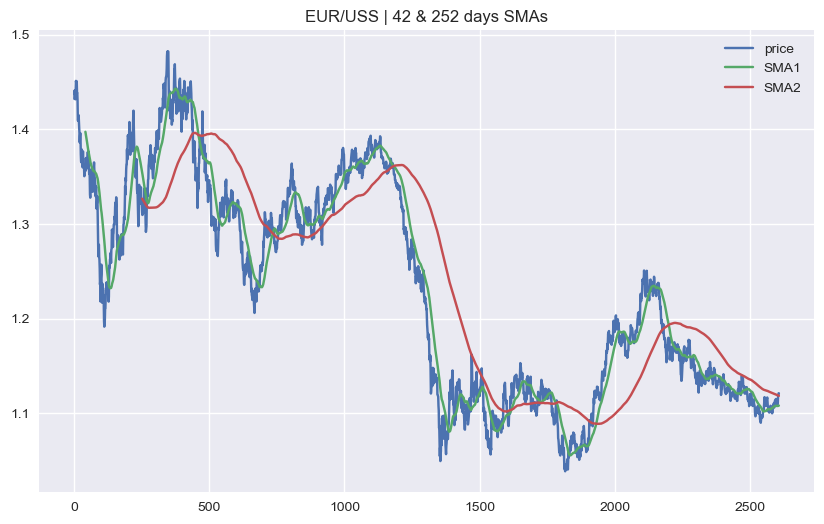

In [66]:
%matplotlib inline
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'sans-serif'
data.plot(title='EUR/USS | 42 & 252 days SMAs',
          figsize=(10, 6));

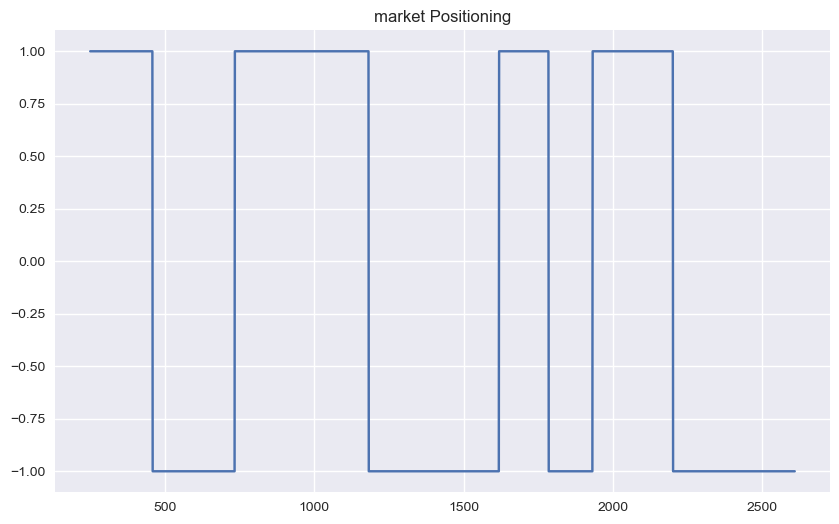

In [74]:
# simple strategy of long when SMA1 is above SMA2
data['position'] = np.where(data['SMA1'] > data['SMA2'],
                            1, -1)
data.dropna(inplace=True)
data['position'].plot(ylim=[-1.1, 1.1],
                     title='market Positioning',
                     figsize=(10,6));

In [76]:
data['returns'] = 

251    1.3118
252    1.3095
253    1.3099
254    1.3119
255    1.3115
Name: price, dtype: float64

In [78]:
p = data.price / data.price.shift(1)

In [80]:
p.head()

251         NaN
252    0.998247
253    1.000305
254    1.001527
255    0.999695
Name: price, dtype: float64